### 목적은 BGCON_CUST_DATA 데이터의 보험사기여부(SIU_CUST_YN)필드의 보험사기(Y) 보험사기아님(N)을 분류하는 문제

# 1. 라이브러리 임포트 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# 보험 계약자 관련 데이터
CUST = pd.read_csv('C:/Users/baek/Desktop/dataset/insurance/BGCON_CUST_DATA_2.csv', delimiter = None,encoding='utf-8')
print(CUST.shape)
print(CUST.isnull().sum())
CUST.tail(20)

(22400, 25)
CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN          1793
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1254
FP_CAREER               0
CUST_RGST             456
CTPR                  621
OCCP_GRP_1            595
OCCP_GRP_2            595
TOTALPREM            5791
MINCRDT              9476
MAXCRDT              9476
WEDD_YN               473
MATE_OCCP_GRP_1     11827
MATE_OCCP_GRP_2     11827
CHLD_CNT              473
LTBN_CHLD_AGE         473
MAX_PAYM_YM          6486
MAX_PRM              6486
CUST_INCM            5263
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      680
dtype: int64


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
22380,19375,1,N,1,20,10581,12.0,N,200306.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,3957,3915.0
22381,3561,1,Y,2,31,26666,20.0,N,200306.0,광주,...,N,NaN,NaN,0.0,0.0,NaN,NaN,3089.0,6877,3089.0
22382,13026,2,NaN,2,12,5779,40.0,N,200603.0,전남,...,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,3578,3505.0
22383,3982,2,NaN,1,14,7222,20.0,N,200404.0,인천,...,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,3937,3937.0
22384,19406,1,Y,2,70,4271,12.0,N,199812.0,광주,...,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0.0
22385,5926,1,N,1,22,6216,99.0,N,200306.0,전남,...,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0,0.0
22386,721,1,N,1,53,24722,20.0,N,200306.0,대구,...,Y,1.주부,주부,2.0,24.0,NaN,NaN,5914.0,9427,5914.0
22387,19376,1,N,2,20,14583,20.0,N,200306.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,4618,4548.0
22388,21373,2,NaN,1,37,15277,20.0,N,200306.0,강원,...,N,NaN,NaN,0.0,0.0,NaN,NaN,3913.0,4660,3913.0
22389,19838,1,Y,2,28,32222,20.0,N,200701.0,경기,...,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,7696,5402.0


In [3]:
# 보험 계약 관련 데이터
CNTT = pd.read_csv('C:/Users/baek/Desktop/dataset/insurance/BGCON_CNTT_DATA_2.csv', delimiter = None,encoding='utf-8')
print(CNTT.shape)
print(CNTT.isnull().sum())
CNTT.tail(20)

(113010, 21)
POLY_NO               0
CUST_ID               0
CUST_ROLE             0
IRKD_CODE_DTAL        0
IRKD_CODE_ITEM        0
GOOD_CLSF_CDNM        0
CNTT_YM               0
CLLT_FP_PRNO         82
REAL_PAYM_TERM        0
SALE_CHNL_CODE        0
CNTT_STAT_CODE       82
EXPR_YM              82
EXTN_YM           54217
LAPS_YM           91629
PAYM_CYCL_CODE       82
MAIN_INSR_AMT        82
SUM_ORIG_PREM        82
RECP_PUBL            84
CNTT_RECP            84
MNTH_INCM_AMT        82
DISTANCE          10556
dtype: int64


,POLY_NO,CUST_ID,CUST_ROLE,IRKD_CODE_DTAL,IRKD_CODE_ITEM,GOOD_CLSF_CDNM,CNTT_YM,CLLT_FP_PRNO,REAL_PAYM_TERM,SALE_CHNL_CODE,...,EXPR_YM,EXTN_YM,LAPS_YM,PAYM_CYCL_CODE,MAIN_INSR_AMT,SUM_ORIG_PREM,RECP_PUBL,CNTT_RECP,MNTH_INCM_AMT,DISTANCE
112990,112750,4675,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,200209.0,3.0,1000000.0,1480.0,0.0,0.0,0.0,NaN
112991,112751,2295,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,200209.0,3.0,1000000.0,1480.0,0.0,0.0,0.0,NaN
112992,112752,13494,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1480.0,0.0,0.0,0.0,NaN
112993,112753,2379,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1480.0,0.0,0.0,0.0,NaN
112994,112754,18027,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1480.0,0.0,0.0,0.0,NaN
112995,112755,6775,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1670.0,0.0,0.0,0.0,NaN
112996,112756,11235,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1670.0,0.0,0.0,0.0,NaN
112997,112757,15757,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1670.0,0.0,0.0,0.0,NaN
112998,112758,13428,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,1670.0,0.0,0.0,0.0,NaN
112999,112759,15616,2,1127,5,보장,200204,163.0,1,2,...,200304.0,NaN,NaN,3.0,1000000.0,2130.0,0.0,0.0,0.0,NaN


In [4]:
# 보험자간 관계 데이터음
FMLY = pd.read_csv('C:/Users/baek/Desktop/dataset/insurance/BGCON_FMLY_DATA_2.csv', delimiter = None,encoding='utf-8')
print(FMLY.shape)
print(FMLY.isnull().sum())
FMLY.tail(20)

(426, 3)
CUST_ID           0
SUB_CUST_ID       0
FMLY_RELN_CODE    0
dtype: int64


,CUST_ID,SUB_CUST_ID,FMLY_RELN_CODE
406,17724,2051,14
407,5782,20676,13
408,1933,21916,17
409,5949,8058,15
410,8499,18368,13
411,12539,13441,13
412,17196,19495,12
413,20685,5685,14
414,14405,14300,12
415,12735,9454,13


In [5]:
# 보험설계사(FP) 관련 데이터
FPINFO = pd.read_csv('C:/Users/baek/Desktop/dataset/insurance/BGCON_FPINFO_DATA_2.csv', delimiter = None,encoding='utf-8')
print(FPINFO.shape)
print(FPINFO.isnull().sum())
FPINFO.tail(20)

(31522, 7)
CLLT_FP_PRNO      0
INCB_DVSN         2
ETRS_YM         257
FIRE_YM         256
BEFO_JOB        256
EDGB            256
BRCH_CODE         2
dtype: int64


,CLLT_FP_PRNO,INCB_DVSN,ETRS_YM,FIRE_YM,BEFO_JOB,EDGB,BRCH_CODE
31502,44,D,NaN,NaN,NaN,NaN,99999999.0
31503,148,D,NaN,NaN,NaN,NaN,99999999.0
31504,5653,D,NaN,NaN,NaN,NaN,99999999.0
31505,113,D,NaN,NaN,NaN,NaN,99999999.0
31506,49,D,NaN,NaN,NaN,NaN,99999999.0
31507,35,D,NaN,NaN,NaN,NaN,99999999.0
31508,74,D,NaN,NaN,NaN,NaN,99999999.0
31509,39,D,NaN,NaN,NaN,NaN,99999999.0
31510,99,D,NaN,NaN,NaN,NaN,99999999.0
31511,82,D,NaN,NaN,NaN,NaN,99999999.0


# 2. 사용할 함수 생성

In [6]:
# join컬럼을 확인하는 함수
def col_diff(df1, df2):
    col = []
    for i in range(0,len(df1.columns)):
        for j in range(0,len(df2.columns)):
            if df1.columns[i] == df2.columns[j]:
                col.append(df1.columns[i])
    print("join columns : ",col)            
    return col

# 특정 컬럼의 널값 퍼센테이지를 확인하는 함수
def None_percentage(df, col):
    per = df[col].isnull().sum() / df.shape[0]
    return print("None값 ",round(per,4) * 100,"%")

# null값이 10% 초과한 컬럼 삭제하는 함수
def col_drop(df):
    temp = df.isnull().sum()
    col = []
    for i in range(0,len(temp)):
        if (df.isnull().sum()[i] / len(df)) > 0.1:
            print("drop columns : ",df.columns[i])
            col.append(df.columns[i])
    df.drop(col, axis=1, inplace=True)
    print("Amount",len(col)," Complete")
    
# 결측값 제거 함수(숫자 데이터는 평균으로, 문자데이터는 빈도수가 높은 값으로 대체)    
def None_replace(df):
    col = []
    temp = df.isnull().sum()
    for i in range(0,len(temp)):
        if (temp[i] >= 1):
            col.append(temp.index[i])
    
    for i in range(0,len(col)):
        # cnt = df.groupby([col[i]]).count()
        if type(df[col[i]][0]) == str:
            target = df.groupby([col[i]]).count().sort_values(by=df.columns[0] ,ascending=False).index[0]   
            df.loc[:,[col[i]]] = df.loc[:, [col[i]]].fillna(target)    
        
    df.fillna(df.mean(),inplace=True)    

# 문자형 컬럼 찾기
def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col

# 숫자형 컬럼 찾기
def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

# 3. 데이터 조인

In [7]:
contractor_contract = pd.merge(left = CUST , right = CNTT, how = "inner", on = col_diff(CUST, CNTT)[0])
contractor_contract.tail(10)

join columns :  ['CUST_ID']


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,EXPR_YM,EXTN_YM,LAPS_YM,PAYM_CYCL_CODE,MAIN_INSR_AMT,SUM_ORIG_PREM,RECP_PUBL,CNTT_RECP,MNTH_INCM_AMT,DISTANCE
113000,21483,1,N,2,30,31944,20.0,N,200306.0,경기,...,999912.0,NaN,NaN,1.0,35000000.0,72531.0,0.0,0.0,3000000.0,18.0
113001,21483,1,N,2,30,31944,20.0,N,200306.0,경기,...,999912.0,NaN,NaN,1.0,10000000.0,23700.0,0.0,0.0,3000000.0,18.0
113002,21483,1,N,2,30,31944,20.0,N,200306.0,경기,...,201110.0,200409.0,NaN,1.0,10000000.0,53700.0,0.0,0.0,0.0,18.0
113003,21483,1,N,2,30,31944,20.0,N,200306.0,경기,...,999912.0,200903.0,NaN,0.0,15596482.0,2427738.0,0.0,0.0,3000000.0,8.0
113004,21940,1,N,2,23,45972,20.0,N,200501.0,경기,...,201802.0,200502.0,NaN,1.0,60000000.0,79200.0,21.0,0.0,3000000.0,23.0
113005,21940,1,N,2,23,45972,20.0,N,200501.0,경기,...,201802.0,NaN,NaN,0.0,30000000.0,970300.0,1.0,0.0,3000000.0,23.0
113006,21940,1,N,2,23,45972,20.0,N,200501.0,경기,...,999912.0,NaN,NaN,1.0,70000000.0,116947.0,0.0,0.0,2500000.0,23.0
113007,20356,1,N,1,15,27777,20.0,N,200306.0,경기,...,202610.0,NaN,NaN,1.0,28000000.0,65440.0,0.0,0.0,2000000.0,24.0
113008,17118,1,N,2,18,21527,20.0,N,200306.0,경기,...,999912.0,NaN,NaN,1.0,24000000.0,200198.0,0.0,0.0,5000000.0,0.0
113009,17118,1,N,2,18,21527,20.0,N,200306.0,경기,...,201711.0,NaN,NaN,1.0,10000000.0,50600.0,-1.0,0.0,1000000.0,5.0


In [8]:
contractor_relationship = pd.merge(left = CUST , right = FMLY, how = "inner", on = col_diff(CUST, FMLY)[0])
contractor_relationship.tail(10)

join columns :  ['CUST_ID']


,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,SUB_CUST_ID,FMLY_RELN_CODE
416,1897,1,N,1,67,31666,20.0,N,200607.0,서울,...,자영업,2.0,33.0,NaN,NaN,NaN,5484,6666.0,2589,12
417,14705,1,N,1,31,12930,20.0,N,200306.0,울산,...,NaN,0.0,0.0,NaN,NaN,3427.0,0,3427.0,16131,13
418,13644,1,Y,1,69,17777,20.0,N,200306.0,경기,...,주부,1.0,34.0,NaN,NaN,NaN,4032,7527.0,1188,14
419,11479,2,NaN,1,66,11098,20.0,N,200306.0,부산,...,자영업,1.0,30.0,NaN,NaN,NaN,4109,4109.0,2593,12
420,10857,1,Y,2,18,10017,40.0,N,200704.0,울산,...,NaN,0.0,0.0,NaN,NaN,NaN,3870,3796.0,9790,13
421,3611,1,Y,2,27,11673,99.0,N,200306.0,경남,...,NaN,0.0,0.0,NaN,NaN,0.0,0,0.0,18394,13
422,19277,1,Y,1,27,14634,13.0,N,200306.0,경기,...,NaN,0.0,0.0,NaN,NaN,0.0,5876,5838.0,14095,13
423,19277,1,Y,1,27,14634,13.0,N,200306.0,경기,...,NaN,0.0,0.0,NaN,NaN,0.0,5876,5838.0,17057,17
424,10744,1,Y,2,15,5019,99.0,N,200512.0,강원,...,NaN,0.0,0.0,NaN,NaN,NaN,0,0.0,14981,13
425,20276,1,Y,1,56,1298,13.0,N,200009.0,광주,...,주부,3.0,22.0,NaN,NaN,5185.0,4597,5185.0,20165,12


# 4. 데이터 전처리

In [9]:
# label컬럼에 결측값 비율확인
None_percentage(contractor_contract, 'SIU_CUST_YN')
None_percentage(contractor_relationship, 'SIU_CUST_YN')

None값  7.960000000000001 %
None값  6.569999999999999 %


In [10]:
# label컬럼에 결측값이 존재하면 해당 row는 사용하지 않음
contract_data = contractor_contract.loc[(contractor_contract['SIU_CUST_YN'] == 'Y') | (contractor_contract['SIU_CUST_YN'] == 'N')]
relationship_data = contractor_relationship.loc[(contractor_relationship['SIU_CUST_YN'] == 'Y') | (contractor_relationship['SIU_CUST_YN'] == 'N')]

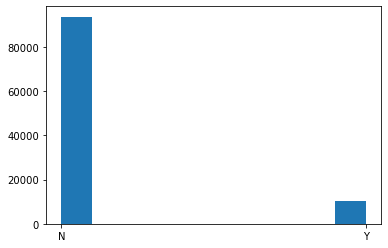

N    93773
Y    10241
Name: SIU_CUST_YN, dtype: int64
0.09845789989809065


In [11]:
# 보험계약유형 데이터 label 데이터 균형 확인
plt.hist(contract_data['SIU_CUST_YN'])
plt.xticks([0,1])
plt.show()

print(contract_data['SIU_CUST_YN'].value_counts())
print(10241/(10241+93773))

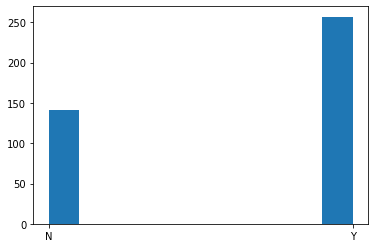

Y    257
N    141
Name: SIU_CUST_YN, dtype: int64
0.6457286432160804


In [12]:
# 보험계약 관계자 데이터 label 데이터 균형 확인
plt.hist(relationship_data['SIU_CUST_YN'])
plt.xticks([0,1])
plt.show()

print(relationship_data['SIU_CUST_YN'].value_counts())
print(257/(257+141))

In [13]:
# 결측치가 10%를 초과하는 컬럼은 삭제
col_drop(contract_data)
print()
col_drop(relationship_data)

drop columns :  TOTALPREM
drop columns :  MINCRDT
drop columns :  MAXCRDT
drop columns :  MATE_OCCP_GRP_1
drop columns :  MATE_OCCP_GRP_2
drop columns :  MAX_PAYM_YM
drop columns :  MAX_PRM
drop columns :  CUST_INCM
drop columns :  EXTN_YM
drop columns :  LAPS_YM
Amount 10  Complete

drop columns :  TOTALPREM
drop columns :  MINCRDT
drop columns :  MAXCRDT
drop columns :  MATE_OCCP_GRP_1
drop columns :  MATE_OCCP_GRP_2
drop columns :  MAX_PAYM_YM
drop columns :  MAX_PRM
drop columns :  CUST_INCM
Amount 8  Complete


C:\Users\baek\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# 결측값을 다른값으로 대체
None_replace(contract_data)

None_replace(relationship_data)

C:\Users\baek\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
C:\Users\baek\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [15]:
# 의미없는 CUST_ID, DIVIDED_SET 삭제
contract_data.drop(['CUST_ID','DIVIDED_SET'], axis=1, inplace=True)

relationship_data.drop(['CUST_ID','DIVIDED_SET'], axis=1, inplace=True)

In [16]:
# type별로 컬럼 분류
str_contract_data = str_col(contract_data)
str_relationship_data = str_col(relationship_data)

int_contract_data = int_col(contract_data)
int_relationship_data = int_col(relationship_data)

['SIU_CUST_YN', 'FP_CAREER', 'CTPR', 'OCCP_GRP_1', 'OCCP_GRP_2', 'WEDD_YN', 'GOOD_CLSF_CDNM', 'CNTT_STAT_CODE']
['SIU_CUST_YN', 'FP_CAREER', 'CTPR', 'OCCP_GRP_1', 'OCCP_GRP_2', 'WEDD_YN']
['SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE', 'CUST_RGST', 'CHLD_CNT', 'LTBN_CHLD_AGE', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM', 'POLY_NO', 'CUST_ROLE', 'IRKD_CODE_DTAL', 'IRKD_CODE_ITEM', 'CNTT_YM', 'CLLT_FP_PRNO', 'REAL_PAYM_TERM', 'SALE_CHNL_CODE', 'EXPR_YM', 'PAYM_CYCL_CODE', 'MAIN_INSR_AMT', 'SUM_ORIG_PREM', 'RECP_PUBL', 'CNTT_RECP', 'MNTH_INCM_AMT', 'DISTANCE']
['SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE', 'CUST_RGST', 'CHLD_CNT', 'LTBN_CHLD_AGE', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM', 'SUB_CUST_ID', 'FMLY_RELN_CODE']


In [17]:
# 정규화를 위한 문자형 데이터와 숫자형 데이터 분리
scale_for_contract_data = contract_data[contract_data.columns.difference(str_contract_data)]
scale_for_relationship_data = relationship_data[relationship_data.columns.difference(str_relationship_data)]
 
not_scale_contract_data = contract_data[contract_data.columns.difference(int_contract_data)]
not_scale_relationship_data = relationship_data[relationship_data.columns.difference(int_relationship_data)]

In [18]:
# 보험 계약 유형 데이터 정규화

# MinMaxcaler 객체 생성
scaler = MinMaxScaler()

# MinMaxcaler로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(scale_for_contract_data)
contract_data_scaled = scaler.transform(scale_for_contract_data)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
contract_data_scaled = pd.DataFrame(data=contract_data_scaled, columns=scale_for_contract_data.columns)

print('feature 들의 정규화 최소 값')
print(contract_data_scaled.min())
print('\nfeature 들의 정규화 최대 값')
print(contract_data_scaled.max())

feature 들의 정규화 최소 값
AGE                 0.0
CHLD_CNT            0.0
CLLT_FP_PRNO        0.0
CNTT_RECP           0.0
CNTT_YM             0.0
CUST_RGST           0.0
CUST_ROLE           0.0
DISTANCE            0.0
EXPR_YM             0.0
IRKD_CODE_DTAL      0.0
IRKD_CODE_ITEM      0.0
JPBASE_HSHD_INCM    0.0
LTBN_CHLD_AGE       0.0
MAIN_INSR_AMT       0.0
MNTH_INCM_AMT       0.0
PAYM_CYCL_CODE      0.0
POLY_NO             0.0
RCBASE_HSHD_INCM    0.0
REAL_PAYM_TERM      0.0
RECP_PUBL           0.0
RESI_COST           0.0
RESI_TYPE_CODE      0.0
SALE_CHNL_CODE      0.0
SEX                 0.0
SUM_ORIG_PREM       0.0
dtype: float64

feature 들의 정규화 최대 값
AGE                 1.0
CHLD_CNT            1.0
CLLT_FP_PRNO        1.0
CNTT_RECP           1.0
CNTT_YM             1.0
CUST_RGST           1.0
CUST_ROLE           1.0
DISTANCE            1.0
EXPR_YM             1.0
IRKD_CODE_DTAL      1.0
IRKD_CODE_ITEM      1.0
JPBASE_HSHD_INCM    1.0
LTBN_CHLD_AGE       1.0
MAIN_INSR_AMT       1.0
MNTH_INC

In [19]:
# 보험 계약 관계자 데이터 정규화

# MinMaxcaler객체 생성
scaler = MinMaxScaler()

# MinMaxcaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(scale_for_relationship_data)
relationship_data_scaled = scaler.transform(scale_for_relationship_data)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
relationship_data_scaled = pd.DataFrame(data=relationship_data_scaled, columns=scale_for_relationship_data.columns)

print('feature 들의 정규화 최소 값')
print(relationship_data_scaled.min())
print('\nfeature 들의 정규화 최대 값')
print(relationship_data_scaled.max())

feature 들의 정규화 최소 값
AGE                 0.0
CHLD_CNT            0.0
CUST_RGST           0.0
FMLY_RELN_CODE      0.0
JPBASE_HSHD_INCM    0.0
LTBN_CHLD_AGE       0.0
RCBASE_HSHD_INCM    0.0
RESI_COST           0.0
RESI_TYPE_CODE      0.0
SEX                 0.0
SUB_CUST_ID         0.0
dtype: float64

feature 들의 정규화 최대 값
AGE                 1.0
CHLD_CNT            1.0
CUST_RGST           1.0
FMLY_RELN_CODE      1.0
JPBASE_HSHD_INCM    1.0
LTBN_CHLD_AGE       1.0
RCBASE_HSHD_INCM    1.0
RESI_COST           1.0
RESI_TYPE_CODE      1.0
SEX                 1.0
SUB_CUST_ID         1.0
dtype: float64


In [20]:
# 숫자형 데이터만 정규화했으므로 데이터를 다시 concat함
not_scale_relationship_data = not_scale_relationship_data.reset_index().drop(['index'],axis=1)
not_scale_contract_data = not_scale_contract_data.reset_index().drop(['index'],axis=1)

real_relationship_data = pd.concat([relationship_data_scaled,not_scale_relationship_data], axis=1)

real_contract_data = pd.concat([contract_data_scaled,not_scale_contract_data], axis=1)

In [21]:
# label데이터를 숫자형으로 변환
real_contract_data['SIU_CUST_YN'] = real_contract_data['SIU_CUST_YN'].replace('N',0)
real_contract_data['SIU_CUST_YN'] = real_contract_data['SIU_CUST_YN'].replace('Y',1)

real_relationship_data['SIU_CUST_YN'] = real_relationship_data['SIU_CUST_YN'].replace('N',0)
real_relationship_data['SIU_CUST_YN'] = real_relationship_data['SIU_CUST_YN'].replace('Y',1)

In [22]:
# 문자형 데이터 원핫인코딩 진행
onehot_contract_data = pd.get_dummies(real_contract_data)
onehot_relationship_data = pd.get_dummies(real_relationship_data)

# 5. 차원축소(보험계약 유형)

In [23]:
for_pca_contract_data = onehot_contract_data[onehot_contract_data.columns.difference(['SIU_CUST_YN'])]

from sklearn.decomposition import PCA

pca = PCA(n_components=60) # 113 -> 60개로 축소

pca.fit(for_pca_contract_data)
contract_data_pca = pca.transform(for_pca_contract_data)
print(contract_data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

contract_data_pca = pd.concat([pd.DataFrame(data=contract_data_pca), pd.DataFrame(onehot_contract_data['SIU_CUST_YN'])], axis=1)

(104014, 60)
설명력 :  0.9697025643420585


# 6. 훈련 데이터 분리(보험계약 유형)

In [24]:
y_target = contract_data_pca['SIU_CUST_YN']
X_data = contract_data_pca.drop(['SIU_CUST_YN'],axis=1,inplace=False)

train_X, test_X, train_Y, test_Y = train_test_split(X_data, y_target, test_size=0.2, shuffle=True, random_state=5)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

print(train_X.isnull().sum())
print(train_Y.isnull().sum())
print(test_X.isnull().sum())
print(test_Y.isnull().sum())

(83211, 60)
(83211,)
(20803, 60)
(20803,)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64
0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0

# 7. 데이터 불균형 해결(보험계약 유형)

### SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(train_X,train_Y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_X.shape, train_Y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (83211, 112) (83211,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (150062, 112) (150062,)
SMOTE 적용 후 레이블 값 분포: 
 0    75031
1    75031
Name: SIU_CUST_YN, dtype: int64


### borderline-SMOTE

In [25]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state=0)
X_train_over,y_train_over = bsmote.fit_resample(train_X,train_Y)

print('BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_X.shape, train_Y.shape)
print('BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('BorderlineSMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (83211, 60) (83211,)
BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (150062, 60) (150062,)
BorderlineSMOTE 적용 후 레이블 값 분포: 
 0    75031
1    75031
Name: SIU_CUST_YN, dtype: int64


### ADASYN

In [48]:
from imblearn.over_sampling import ADASYN

ads = ADASYN(random_state=0)
X_train_over,y_train_over = ads.fit_resample(train_X,train_Y)

print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', train_X.shape, train_Y.shape)
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('ADASYN 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

ADASYN 적용 전 학습용 피처/레이블 데이터 세트:  (318, 35) (318,)
ADASYN 적용 후 학습용 피처/레이블 데이터 세트:  (422, 35) (422,)
ADASYN 적용 후 레이블 값 분포: 
 0    216
1    206
Name: SIU_CUST_YN, dtype: int64


# 8. 모델링(보험계약 유형)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)


import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(60,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                2928      
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


C:\Users\baek\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [31]:
history = model.fit(X_train_over, y_train_over, epochs=100, batch_size=32, validation_split=0.25, callbacks=[checkpoint, earlystopping])

Epoch 1/100
3518/3518 [==============================] - 3s 676us/step - loss: 0.4993 - accuracy: 0.7488 - val_loss: 0.4607 - val_accuracy: 0.8623

Epoch 00001: val_loss improved from inf to 0.46072, saving model to tmp\ckeckpointer.ckpt
Epoch 2/100
3518/3518 [==============================] - 2s 700us/step - loss: 0.4276 - accuracy: 0.8012 - val_loss: 0.4005 - val_accuracy: 0.8799

Epoch 00002: val_loss improved from 0.46072 to 0.40053, saving model to tmp\ckeckpointer.ckpt
Epoch 3/100
3518/3518 [==============================] - 2s 682us/step - loss: 0.3968 - accuracy: 0.8193 - val_loss: 0.5065 - val_accuracy: 0.8049

Epoch 00003: val_loss did not improve from 0.40053
Epoch 4/100
3518/3518 [==============================] - 2s 702us/step - loss: 0.3799 - accuracy: 0.8292 - val_loss: 0.4996 - val_accuracy: 0.7973

Epoch 00004: val_loss did not improve from 0.40053
Epoch 5/100
3518/3518 [==============================] - 2s 689us/step - loss: 0.3673 - accuracy: 0.8369 - val_loss: 0.430

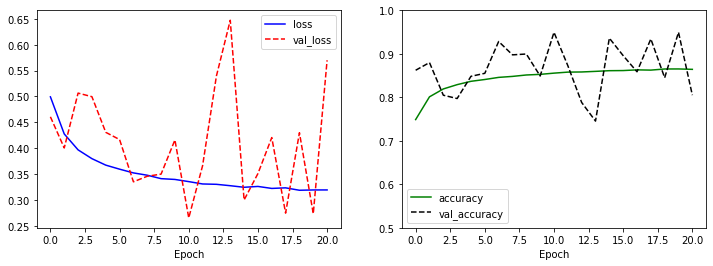

In [32]:
# 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

In [33]:
model.evaluate(test_X, test_Y)

651/651 [==============================] - 0s 473us/step - loss: 0.3525 - accuracy: 0.8747


[0.3525274097919464, 0.8747296333312988]

# 8-1 relu말고 tanh사용해보기(보험계약 유형)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)


import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='tanh', input_shape=(60,)),
    tf.keras.layers.Dense(units=24, activation='tanh'),
    tf.keras.layers.Dense(units=12, activation='tanh'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                2928      
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_10 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


C:\Users\baek\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [35]:
history = model.fit(X_train_over, y_train_over, epochs=100, batch_size=32, validation_split=0.25, callbacks=[checkpoint, earlystopping])

Epoch 1/100
3518/3518 [==============================] - 2s 630us/step - loss: 0.5249 - accuracy: 0.7295 - val_loss: 0.7952 - val_accuracy: 0.5745

Epoch 00001: val_loss improved from inf to 0.79520, saving model to tmp\ckeckpointer.ckpt
Epoch 2/100
3518/3518 [==============================] - 2s 640us/step - loss: 0.4594 - accuracy: 0.7758 - val_loss: 0.6592 - val_accuracy: 0.6431

Epoch 00002: val_loss improved from 0.79520 to 0.65919, saving model to tmp\ckeckpointer.ckpt
Epoch 3/100
3518/3518 [==============================] - 2s 661us/step - loss: 0.4262 - accuracy: 0.7979 - val_loss: 0.5943 - val_accuracy: 0.7281

Epoch 00003: val_loss improved from 0.65919 to 0.59426, saving model to tmp\ckeckpointer.ckpt
Epoch 4/100
3518/3518 [==============================] - 2s 674us/step - loss: 0.4057 - accuracy: 0.8130 - val_loss: 0.5198 - val_accuracy: 0.7930

Epoch 00004: val_loss improved from 0.59426 to 0.51978, saving model to tmp\ckeckpointer.ckpt
Epoch 5/100
3518/3518 [=============

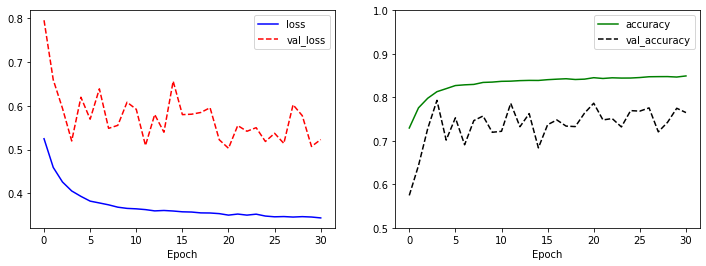

In [36]:
# 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

In [37]:
model.evaluate(test_X, test_Y)

651/651 [==============================] - 0s 318us/step - loss: 0.3278 - accuracy: 0.8602


[0.327812522649765, 0.8601644039154053]

# 5. 차원축소(보험계약 관계)

In [38]:
for_pca_relationship_data = onehot_relationship_data[onehot_relationship_data.columns.difference(['SIU_CUST_YN'])]

from sklearn.decomposition import PCA

pca = PCA(n_components=35) # 62 -> 35개로 축소

pca.fit(for_pca_relationship_data)
relationship_data_pca = pca.transform(for_pca_relationship_data)
print(relationship_data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

relationship_data_pca = pd.concat([pd.DataFrame(data=relationship_data_pca), pd.DataFrame(onehot_relationship_data['SIU_CUST_YN'])], axis=1)

(398, 35)
설명력 :  0.9696659826783864


# 6. 훈련데이터 분리(보험계약 관계)

In [39]:
y_target = relationship_data_pca['SIU_CUST_YN']
X_data = relationship_data_pca.drop(['SIU_CUST_YN'],axis=1,inplace=False)

train_X, test_X, train_Y, test_Y = train_test_split(X_data, y_target, test_size=0.2, shuffle=True, random_state=5)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

print(train_X.isnull().sum())
print(train_Y.isnull().sum())
print(test_X.isnull().sum())
print(test_Y.isnull().sum())

(318, 35)
(318,)
(80, 35)
(80,)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64
0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64
0


# 7. 모델링(보험계약 관계)

In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)


import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=26, activation='relu', input_shape=(35,)),
    tf.keras.layers.Dense(units=13, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 26)                936       
_________________________________________________________________
dense_37 (Dense)             (None, 13)                351       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 14        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


C:\Users\baek\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [73]:
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25, callbacks=[checkpoint, earlystopping])

Epoch 1/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7136 - accuracy: 0.5798 - val_loss: 0.6608 - val_accuracy: 0.6375

Epoch 00001: val_loss improved from inf to 0.66084, saving model to tmp\ckeckpointer.ckpt
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6513 - val_loss: 0.6700 - val_accuracy: 0.6375

Epoch 00002: val_loss did not improve from 0.66084
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.6513 - val_loss: 0.6893 - val_accuracy: 0.6375

Epoch 00003: val_loss did not improve from 0.66084
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.6513 - val_loss: 0.7666 - val_accuracy: 0.6375

Epoch 00004: val_loss did not improve from 0.66084
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.6513 - val_loss: 0.8105 - val_accuracy: 0.5625

Epoch 00005: val_loss did not improve from 0.66084
Epoch

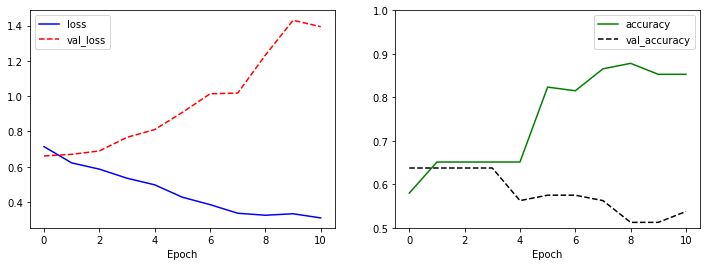

In [74]:
# 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

In [75]:
model.evaluate(test_X, test_Y)

3/3 [==============================] - 0s 1ms/step - loss: 0.7869 - accuracy: 0.7875


[0.7869009375572205, 0.7875000238418579]